In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [17]:
im = Image.open('data/raw/a0001-jmac_DSC1459.tif')
imarray = np.array(im).astype(np.uint16)
print(imarray)

[[[167 169 184]
  [167 170 185]
  [168 171 186]
  ...
  [124 132 173]
  [122 130 172]
  [122 129 171]]

 [[168 170 186]
  [168 170 187]
  [168 170 185]
  ...
  [126 133 174]
  [126 133 174]
  [126 133 173]]

 [[170 171 186]
  [168 170 185]
  [167 170 184]
  ...
  [128 134 176]
  [129 135 177]
  [129 134 176]]

 ...

 [[135 116  82]
  [132 112  78]
  [126 105  70]
  ...
  [161 134  91]
  [162 136  90]
  [160 134  87]]

 [[126 106  75]
  [118  96  69]
  [104  81  52]
  ...
  [160 132  89]
  [159 133  89]
  [159 133  88]]

 [[101  87  60]
  [ 91  75  53]
  [ 78  62  38]
  ...
  [161 133  88]
  [161 134  90]
  [161 134  90]]]


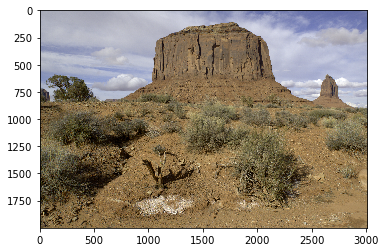

********************************************************************


In [18]:
plt.imshow(imarray, interpolation='nearest')
plt.show() # To see how the tiff file looks like
img = (np.maximum(imarray, 0) / imarray.max()) * 255.0
print("********************************************************************")
img = Image.fromarray(np.uint8(img))
img.save('data/result/img.png')

In [8]:
fil = 'data/raw/a0001-jmac_DSC1459.tif'
im = cv2.imread(fil, -1).astype(np.float32)

In [9]:
tonemapLDR = cv2.createTonemap(2.2)
im = tonemapLDR.process(im)

In [11]:
for i in [1, 1.112, 1.414]:
    im2_8bit = np.clip(im * 256 / i, 0, 255).astype('uint8')
    path = 'data/result'
    fname = 'exposure0' + str(i) + '.png'
    new_filename = os.path.join(path, fname)
    cv2.imwrite(new_filename, im2_8bit)

In [22]:
raw_dir = 'data/raw_hdr'
res_dir = 'data/result_no_tonemap'
# tonemapLDR = cv2.createTonemap(2.2)
for filename in os.listdir(raw_dir):
    f = os.path.join(raw_dir, filename)
    # Only work on the image file
    if os.path.isfile(f):
        im = cv2.imread(f, cv2.IMREAD_ANYDEPTH)
        # ldr = tonemapLDR.process(im)
        for i in [1, 2, 4]:
            im2_8bit = np.clip(im * 1024 / i, 0, 255).astype('uint8')
            new_filename = filename + str(i) + ".png"
            new_filename = os.path.join(res_dir, new_filename)
            cv2.imwrite(new_filename, im2_8bit)

In [23]:
raw_dir = 'data/raw_hdr'
res_dir = 'data/result_with_tonemap'
tonemapLDR = cv2.createTonemap(2.2)
for filename in os.listdir(raw_dir):
    f = os.path.join(raw_dir, filename)
    # Only work on the image file
    if os.path.isfile(f):
        im = cv2.imread(f, cv2.IMREAD_ANYDEPTH)
        ldr = tonemapLDR.process(im)
        for i in [1, 2, 4]:
            im2_8bit = np.clip(im * 1024 / i, 0, 255).astype('uint8')
            new_filename = filename + str(i) + ".png"
            new_filename = os.path.join(res_dir, new_filename)
            cv2.imwrite(new_filename, im2_8bit)

In [ ]:
# The script is not one-size-fit-all.